<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

#  **Model Building End-to-End Series**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section2)<br>

**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Loading data using Pandas**](#Section4)<br>

**5.** [**Seperating data into Train and Test sets**](#Section5)<br>

**6.** [**Model Building**](#Section6)<br>

**7.** [**Model Evaluation**](#Section7)<br>

---
<a name = Section2></a>
# **1. Introduction**
---


- Depending on the **data type** (qualitative or quantitative) of the **target variable** (commonly referred to as the Y variable) we are either going to be building a **classification** (if Y is qualitative) or **regression** (if Y is quantitative) model. 

- **Machine learning algorithms** could be broadly categorised to one of **three** types:
  - **Supervised learning** — is a machine learning task that establishes the mathematical relationship between input X and output Y variables. Such X, Y pair constitutes the labeled data that are used for model building in an effort to learn how to predict the output from the input.

  - **Unsupervised learning** — is a machine learning task that makes use of only the input X variables. Such X variables are unlabeled data that the learning algorithm uses in modeling the inherent structure of the data.

  - **Reinforcement learning** — is a machine learning task that decides on the next course of action and it does this by learning through trial and error in an effort to maximize the reward

---
<a name = Section2></a>
# **2. Problem Statement**
---

Due to the **boom** in the telecom industry with **4G technology**, it has become a pain in the neck for the company to **retain their customers**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Telecom/churn2.png"width="350" height="220"/></center>

- They are in the **middle** of setting up more **cell sites** on the **4G network** to improve their **4G services**.

-  It is **plausible** for customers to choose **4G services** over **3G services** due to benefits of **cost,speed, latency etc**.



- Till now they have been using manual traditional ways which now has become a problem to handle due to work complication.

<center><img src = "https://raw.githubusercontent.com/insaid2018/Term-2/master/images/87217572-51866a00-c368-11ea-90b5-dd2e28fd00de.jpg"width="400" height="280"/></center>

- They have a detailed history of their customers and are looking for an automated solution toidentify the likeliness of customer churning from using their services.

- The data is **stored** in their **MongoDB** and you need to **extract to move further with your Data Science skills**.

---
<a name = Section3></a>
# **3. Importing Libraries**
---


### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

---
<a name = Section4></a>
# **4. Loading data using Pandas**
---

In [2]:
data = pd.read_csv("./Cleaned_Churn.csv")
data.head()

Unnamed: 0  tenure  PhoneService  Contract  PaperlessBilling  \
0           0     1.0             0         0                 1   
1           1    34.0             1         1                 0   
2           2     2.0             1         0                 1   
3           3    45.0             0         1                 0   
4           4     2.0             1         0                 1   

   PaymentMethod  MonthlyCharges  Churn  
0              2           29.85      0  
1              3           56.95      0  
2              3           53.85      1  
3              0           42.30      0  
4              2           70.70      1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   tenure            7043 non-null   float64
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   int64  
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   int64  
 6   MonthlyCharges    7043 non-null   float64
 7   Churn             7043 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 440.3 KB


---
<a name = Section4></a>
# **5. Separating data into train and test sets**
---

<a id=section5></a>
## 5.1 Separating Independent and Dependent variables

In [7]:
X = data.drop(['Unnamed: 0','Churn'], axis = 1)
y = data['Churn']

In [8]:
X.shape

(7043, 6)

In [9]:
y.shape

(7043,)

<a id=section5></a>
## 5.2 Splitting data into train and test set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

---
<a name = Section6></a>
# **6. Model Building**
---

In [11]:
#Logistic Regression

log_model = LogisticRegression(max_iter=1000)
scores = cross_val_score(estimator=log_model, X=X_train, y=y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean", scores.mean())

[0.85511695 0.83171907 0.8119604  0.84895992 0.82021475]
Mean 0.8335942182901401


In [12]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
scores = cross_val_score(estimator=decision_tree, X=X_train, y=y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean", scores.mean())

[0.7998653  0.78148453 0.75480185 0.78344967 0.74957882]
Mean 0.7738360349451494


In [13]:
model_rf = RandomForestClassifier()

In [14]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
scores = cross_val_score(estimator=model_rf, X=X_train, y=y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean", scores.mean())

[0.86385174 0.83833038 0.82180859 0.85553511 0.82081394]
Mean 0.8400679495277237


### 6.1 CHECKING FEATURE IMPORTANCE

In [15]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [16]:
# Checking the feature importances of various features.
# Sorting the importances by descending order (lowest importance at the bottom).
for score, name in sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of Contract : 34.28860483552098 %
Feature importance of tenure : 30.594581810798783 %
Feature importance of MonthlyCharges : 21.73101486021982 %
Feature importance of PaymentMethod : 8.123568638293088 %
Feature importance of PaperlessBilling : 4.406016326941685 %
Feature importance of PhoneService : 0.8562135282256437 %


In [17]:
model_rf.feature_importances_*100

array([30.59458181,  0.85621353, 34.28860484,  4.40601633,  8.12356864,
       21.73101486])

Text(0.5, 1.0, 'Feature Importance of each Feature')

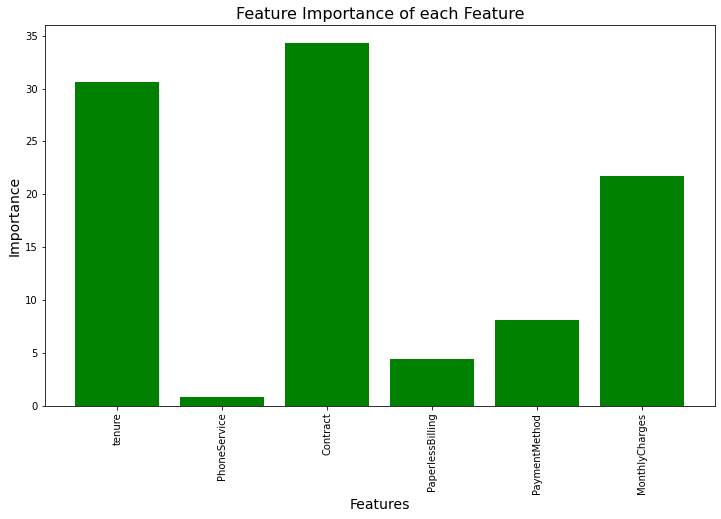

In [19]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(X_train.columns, model_rf.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

### 6.2 HYPERPARAMETER TUNING

In [42]:
param_grid = [{'n_estimators': [100, 200, 300, 400, 500],
               'max_depth': [None, 2, 3, 4, 5,10, 20],
               'max_features': ['auto', 2, 3,  4, 8, 16, 'log2', None]}]

In [43]:
temp_rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [62]:
grid_search1 = GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search = GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [63]:
%%time
grid_search.fit(X_train, y_train)

/Users/dhparikh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.7713794  0.76932743 0.76901185 0.7690126  0.76885487 0.7713794
 0.76932743 0.76901185 0.7690126  0.76885487 0.7750084  0.77106357
 0.77295743 0.77106406 0.77090571 0.77216804 0.77185234 0.77185271
 0.77059063 0.77090584        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.7713794  0.76932743 0.76901185 0.7690126  0.76885487 0.76838156
 0.7691702  0.76743469 0.7691702  0.76932805 0.7533916  0.75843979
 0.75985935 0.76143714 0.76143701 0.7533916  0.75843979 0.75985935
 0.76143714 0.76143701 0.777058   0.77642647 0.77721536 0.77847719
 0.77753044 0.78447225 0.78179049 0.78037018 0.77989687 0.77895013
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.7533916  0.75843979
 0.75985935 0.76143714 0.76143701 0.756

CPU times: user 9.48 s, sys: 651 ms, total: 10.1 s
Wall time: 6min 16s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 4, 5, 10, 20],
                          'max_features': ['auto', 2, 3, 4, 8, 16, 'log2',
                                           None],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             scoring='accuracy')

In [80]:
# Calculating the best RMSE score found by Grid Search 
grid_search.best_score_

0.7933092901834732

In [81]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 4, 'n_estimators': 200}

### **6.3 FINAL MODEL**

In [82]:
# Creating the final random forest model from the grid search's best estimator.
final_rf = grid_search.best_estimator_

In [83]:
# Fitting the final model with training set
final_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200, n_jobs=-1,
                       random_state=0)

In [84]:
# Making predictions on the train set
y_train_pred = final_rf.predict(X_train)

In [85]:
# Making predictions on the test set
y_test_pred = final_rf.predict(X_test)

###  **Saving the model as Pickle String**

In [86]:
import pickle

In [87]:
pickle.dump(final_rf, open("randomforest.pkl","wb"))

---
<a name = Section7></a>
# **7. Model Evaluation**
---

### **CONFUSION MATRIX**

In [88]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

In [89]:
confusion_mat.index = ['Actual Negative', 'Actual Positive']
confusion_mat.columns = ['Predicted Negative', 'Predicted Positive']
confusion_mat

Predicted Negative  Predicted Positive
Actual Negative                 491                  42
Actual Positive                  92                  80

### **ACCURACY SCORE**

In [90]:
# Accuracy score on the training set.
print('Accuracy score for train data is:', accuracy_score(y_train, y_train_pred))

Accuracy score for train data is: 0.8037235721047649


In [91]:
# Accuracy score on the test set.
print('Accuracy score for test data is:', accuracy_score(y_test, y_test_pred))

Accuracy score for test data is: 0.8099290780141843


### **Precision Score**

In [92]:
# Precision score on the training set.
print('Accuracy score for train data is:', precision_score(y_train, y_train_pred))

Accuracy score for train data is: 0.6974716652136007


In [93]:
# Precision score on the test set.
print('Accuracy score for test data is:', precision_score(y_test, y_test_pred))

Accuracy score for test data is: 0.6557377049180327


### **Recall Score**

In [94]:
# recall score on the training set.
print('Accuracy score for train data is:', recall_score(y_train, y_train_pred))

Accuracy score for train data is: 0.4714201532115498


In [95]:
# recall score on the test set.
print('Accuracy score for test data is:', recall_score(y_test, y_test_pred))

Accuracy score for test data is: 0.46511627906976744
